In [23]:
import pandas as pd

# Assuming the file is named 'travelvisitplaces.csv'
file_path = 'travelvisitplaces.csv'
data = pd.read_csv(file_path)

# Keep only the relevant columns
data = data[['State', 'City', 'Type', 'Google review rating', 'Entrance Fee in INR', 'Name']]
data

,State,City,Type,Google review rating,Entrance Fee in INR,Name
0,Delhi,Delhi,War Memorial,4.6,0,India Gate
1,Delhi,Delhi,Tomb,4.5,30,Humayun's Tomb
2,Delhi,Delhi,Temple,4.6,60,Akshardham Temple
3,Delhi,Delhi,Theme Park,4.1,50,Waste to Wonder Park
4,Delhi,Delhi,Observatory,4.2,15,Jantar Mantar
...,...,...,...,...,...,...
320,Gujarat,Gandhinagar,Temple,4.6,0,Akshardham
321,Uttar Pradesh,Agra,Fort,4.5,40,Agra Fort
322,Madhya Pradesh,Bhopal,Museum,4.7,10,Madhya Pradesh Tribal Museum
323,Rajasthan,Jaipur,Palace,4.4,200,City Palace


In [ ]:
data.isnull().sum()

       Google review rating  Entrance Fee in INR
count            325.000000           325.000000
mean               4.486154           115.809231
std                0.274580           530.859785
min                1.400000             0.000000
25%                4.400000             0.000000
50%                4.500000             0.000000
75%                4.600000            40.000000
max                4.900000          7500.000000


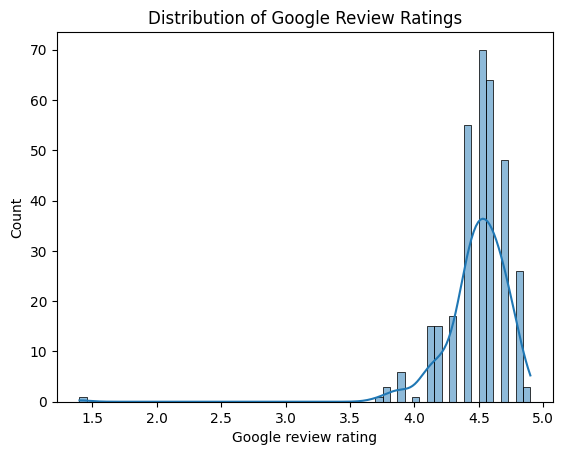

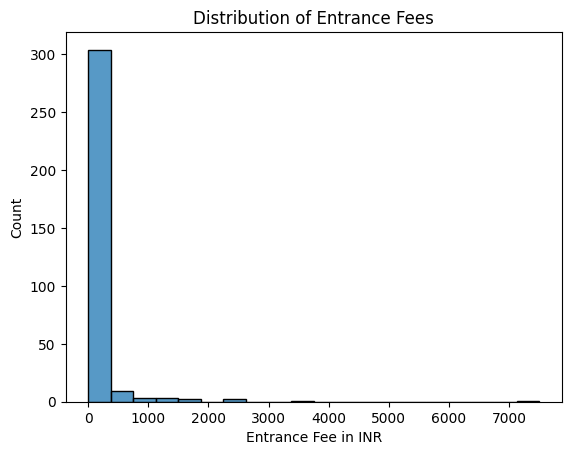

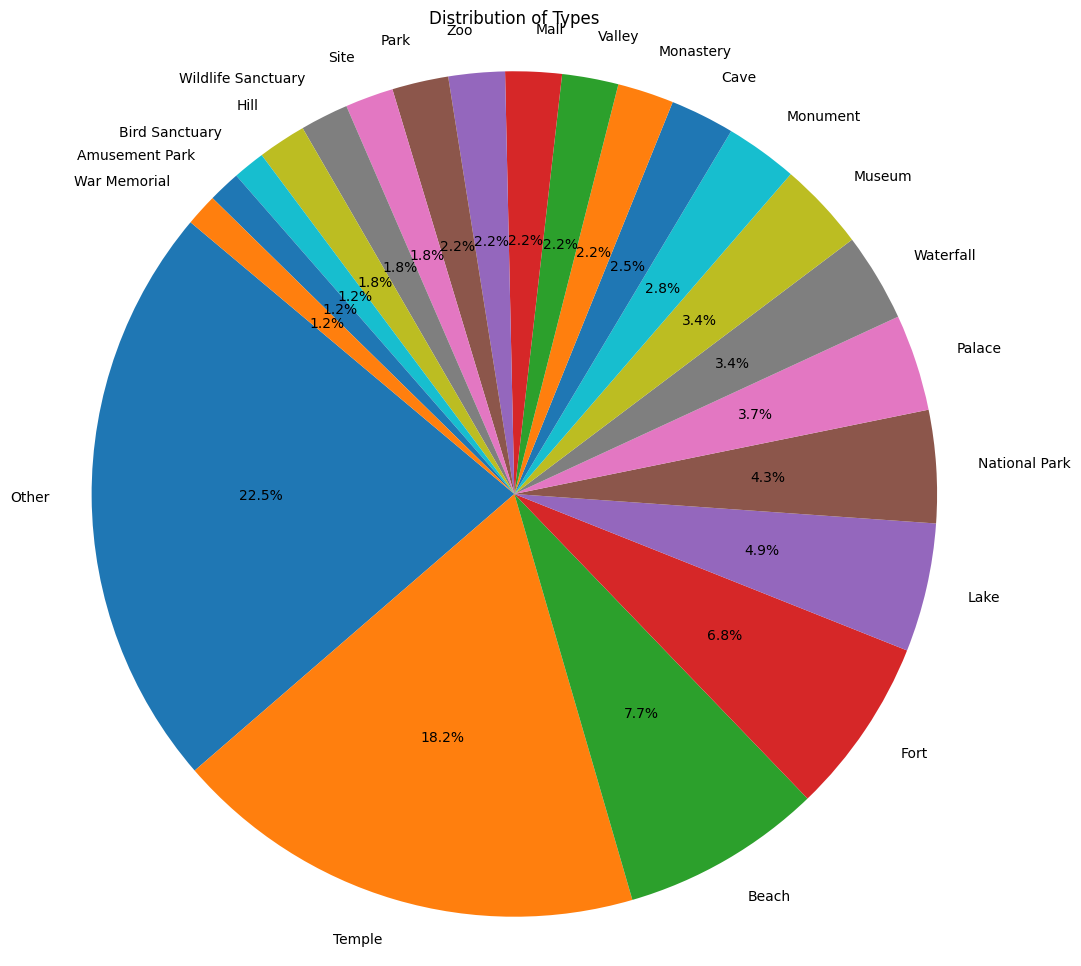

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(data.describe())

# Distribution of review ratings
sns.histplot(data['Google review rating'], kde=True)
plt.title('Distribution of Google Review Ratings')
plt.show()

# Entrance fee distribution
sns.histplot(data['Entrance Fee in INR'], bins=20)
plt.title('Distribution of Entrance Fees')
plt.show()

a=data['Type']

import matplotlib.pyplot as plt

# Count the frequency of each type
type_counts = data['Type'].value_counts()

# Filter types with less than 2% occurrence
other_types = type_counts[type_counts / len(data) < 0.01].index

# Replace occurrences of these types with 'Other'
data['Type'] = data['Type'].replace(other_types, 'Other')

# Recount the frequency of each type
type_counts = data['Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(12, 12))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.axis('equal')
plt.show()

data['Type']=a


In [25]:
import random
import numpy

def generate_random_scenario(data):
    # Get unique states and types from the dataset
    unique_states = data['State'].unique()
    state_type_map = {state: data[data['State'].str.lower() == state.lower()]['Type'].unique() for state in unique_states}
    user_state = numpy.random.choice(unique_states)
    
    # Randomly select a type from the types available in the selected state
    user_type =numpy.random.choice(state_type_map[user_state])
    
    # Get the range of ratings and entrance fees for the selected state and type
    state_data = data[data['State'].str.lower() == user_state.lower()]
    type_data = state_data[state_data['Type'].str.lower() == user_type.lower()]
    
    min_rating = type_data['Google review rating'].min()
    max_rating = type_data['Google review rating'].max()
    
    # Handle missing values in entrance fee column
    min_fee = type_data['Entrance Fee in INR'].min()
    max_fee = type_data['Entrance Fee in INR'].max()
    
    if pd.isnull(min_fee) or pd.isnull(max_fee):
        min_fee = 0
        max_fee = 0
    
    # Generate random rating and fee within the range
    user_rating = round(random.uniform(min_rating, max_rating), 1)
    user_fee = random.randint(min_fee, max_fee)
    
    return {'State': user_state, 'Type': user_type, 'MinRating': user_rating, 'MaxFee': user_fee}



def calculate_accuracy(data, num_scenarios):
    correct_predictions = 0
    
    for _ in range(num_scenarios):
        # Generate a random scenario
        random_scenario = generate_random_scenario(data)
        
        # Filter data based on random scenario
        user_state = random_scenario['State']
        user_type = random_scenario['Type']
        user_rating = random_scenario['MinRating']
        user_fee = random_scenario['MaxFee']
        
        type_data = data[(data['State'].str.lower() == user_state.lower()) & (data['Type'].str.lower() == user_type.lower())]
        recommendation = type_data[(type_data['Google review rating'] >= user_rating) & (type_data['Entrance Fee in INR'] <= user_fee)]
        
        # Check if recommendation is accurate
        if not recommendation.empty:
            recommended_place_name = recommendation.iloc[0]['Name']
            if recommended_place_name in data[data['State'].str.lower() == user_state.lower()]['Name'].values:
                correct_predictions += 1
    
    # Calculate accuracy percentage
    accuracy_percentage = (correct_predictions / num_scenarios) * 100
    print("Total Scenarios:",num_scenarios)
    print("Correct Scenarios:",correct_predictions)
    
    return accuracy_percentage

# Example usage:
num_scenarios = 2000  # Number of scenarios to generate
accuracy = calculate_accuracy(data, num_scenarios)
print(f"Accuracy of the recommendation system for {num_scenarios} scenarios: {accuracy:.2f}%")


Total Scenarios: 2000
Correct Scenarios: 1983
Accuracy of the recommendation system for 2000 scenarios: 99.15%


In [27]:
# Step 1: Take user's state as input
user_state = input("Enter the state you're interested in: ")
if user_state.lower() not in data['State'].str.lower().unique():
    print("State not found in the dataset. Please enter a valid state.")
else:
    # Step 2: Display types available in the state
    print("Available types in your state:", data[data['State'].str.lower() == user_state.lower()]['Type'].unique())

    # Step 3: Take user's type preference and show rating range
    user_type = input("Enter your preferred type: ")
    type_data = data[(data['State'].str.lower() == user_state.lower()) & (data['Type'].str.lower() == user_type.lower())]
    print("Rating range for selected type:", type_data['Google review rating'].min(), "to", type_data['Google review rating'].max())
    print("Fee range for selected type:", type_data['Entrance Fee in INR'].min(), "to", type_data['Entrance Fee in INR'].max())

    # Step 4: Take user's rating and entrance fee preferences
    user_rating = float(input("Enter your minimum rating preference: "))


    user_fee = int(input("Enter your maximum acceptable entrance fee: "))

    # Step 5: Recommend a place
    recommendation = type_data[(type_data['Google review rating'] >= user_rating) & (type_data['Entrance Fee in INR'] <= user_fee)]
    if not recommendation.empty:
        print("We recommend visiting:", recommendation.iloc[0]['Name'])
    else:
        print("Sorry, no places match your preferences.")



Available types in your state: ['Palace' 'Botanical Garden' 'Park' 'Government Building' 'Temple' 'Site'
 'Waterfall' 'Beach' 'Mountain Peak' 'Cave' 'Mausoleum' 'National Park'
 'Amusement Park' 'Mall']
Rating range for selected type: 4.6 to 4.6
Fee range for selected type: 30 to 30
We recommend visiting: Badami Cave Temples
